In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copairs import map
from copairs.map.average_precision import p_values
from copairs.matching import assign_reference_index
from notebook_init_utils import bandicoot_check, init_notebook
from numpy.random import rand
from scipy.spatial.distance import cosine

root_dir, in_notebook = init_notebook()
if in_notebook:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

image_base_dir = bandicoot_check(
    pathlib.Path(os.path.expanduser("~/mnt/bandicoot")).resolve(), root_dir
)

In [2]:
def paired_permutation_test(XA: np.array, XB: np.array, n_perm=10000):
    """
    Description
    ----------
    Perform a paired permutation test to assess the significance of the difference
    in similarity (1 - correlation) between two sets of profiles XA and XB.
    Parameters
    ----------
    XA : np.array
        First set of profiles (samples x features).
    XB : np.array
        Second set of profiles (samples x features).
    n_perm : int
        Number of permutations to perform.
    Returns
    -------
    D_obs : float
        Observed mean distance (1 - correlation) between XA and XB.
    pval : float
        P-value from the permutation test.
    """
    # observed distance
    D_obs = np.mean([1 - np.corrcoef(a, b)[0, 1] for a, b in zip(XA, XB)])

    D_perm = np.zeros(n_perm)

    for p in range(n_perm):
        XA_p = XA.copy()
        XB_p = XB.copy()

        swap = rand(XA.shape[0]) < 0.5
        XA_p[swap], XB_p[swap] = XB[swap], XA[swap]

        D_perm[p] = np.mean([1 - np.corrcoef(a, b)[0, 1] for a, b in zip(XA_p, XB_p)])

    pval = (1 + np.sum(D_perm >= D_obs)) / (1 + n_perm)
    return D_obs, pval

In [3]:
organoid_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/organoid_fs_convolution_profiles.parquet"
).resolve()
sc_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/sc_fs_convolution_profiles.parquet"
).resolve()

sc_df = pd.read_parquet(sc_profile_path)
organoid_df = pd.read_parquet(organoid_profile_path)  # replace with organoid path

figure_dir = pathlib.Path(
    f"{root_dir}/7.technical_analysis/figures/convolution_profile_analysis"
).resolve()
figure_dir.mkdir(parents=True, exist_ok=True)

In [4]:
for object_id in sc_df["Metadata_object_id"].unique():
    tmp_df = sc_df[sc_df["Metadata_object_id"] == object_id].copy()

    # setup the mAP
    reference_col = "Metadata_reference_index"
    df_sc_activity = assign_reference_index(
        sc_df,
        "Metadata_convolution == '0'",  # condition to get reference profiles (neg controls)
        reference_col=reference_col,
        default_value=-1,
    )
    # positive pairs are replicates of the same treatment
    pos_sameby = ["Metadata_convolution", reference_col]
    pos_diffby = []

    neg_sameby = []
    # negative pairs are replicates of different treatments
    neg_diffby = ["Metadata_convolution", reference_col]
    metadata = df_sc_activity.filter(regex="^Metadata")
    profiles = df_sc_activity.filter(regex="^(?!Metadata)").values

    activity_sc_ap = map.average_precision(
        metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby
    )
    activity_sc_ap = activity_sc_ap.query("Metadata_convolution != '0'")  # remove DMSO

    activity_map = map.mean_average_precision(
        activity_sc_ap, pos_sameby, null_size=1000000, threshold=0.05, seed=0
    )

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:50: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

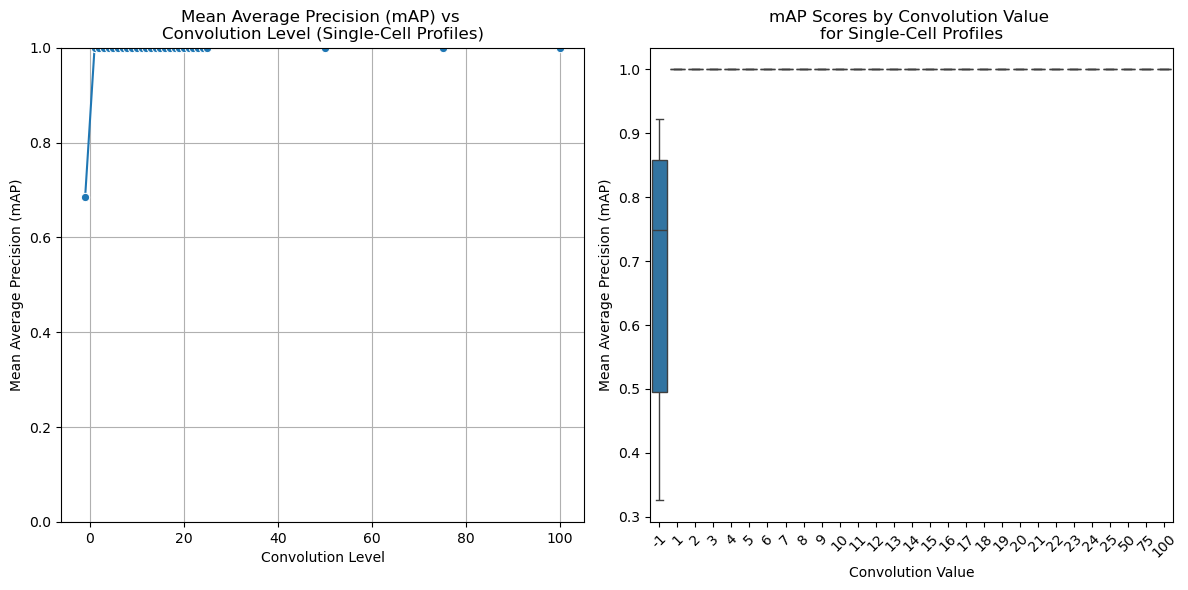

In [5]:
# plot the mAP scores against the convolution values
activity_map["Metadata_convolution"] = activity_map["Metadata_convolution"].astype(int)
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.lineplot(
    data=activity_map,
    x="Metadata_convolution",
    y="mean_average_precision",
    marker="o",
)
plt.title("Mean Average Precision (mAP) vs \nConvolution Level (Single-Cell Profiles)")
plt.xlabel("Convolution Level")
plt.ylabel("Mean Average Precision (mAP)")
plt.ylim(0, 1)
plt.grid(True)
plt.subplot(122)
sns.boxplot(
    data=activity_sc_ap,
    x="Metadata_convolution",
    y="average_precision",
    order=sorted(activity_sc_ap["Metadata_convolution"].unique(), key=int),
)
plt.xlabel("Convolution Value")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP Scores by Convolution Value \nfor Single-Cell Profiles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(figure_dir / "sc_convolution_map.png", dpi=600, bbox_inches="tight")
plt.show()

In [6]:
# calculate a per profile distance between convolution levels
profile_distances = {}
control_profile_df = sc_df[sc_df["Metadata_convolution"] == "0"]
comparison_profile_df = sc_df[sc_df["Metadata_convolution"] != "0"]

for convolution_level in tqdm(
    comparison_profile_df["Metadata_convolution"].unique(),
    desc="Calculating profile distances",
):
    tmp_df = comparison_profile_df[
        comparison_profile_df["Metadata_convolution"] == convolution_level
    ]
    tmp_control_profile_df = control_profile_df.copy()
    if len(tmp_df) != len(control_profile_df):
        # downsample to the smaller size by removing the object ids not in both
        common_object_ids = set(control_profile_df["Metadata_object_id"]).intersection(
            set(tmp_df["Metadata_object_id"])
        )
        tmp_control_profile_df = control_profile_df[
            control_profile_df["Metadata_object_id"].isin(common_object_ids)
        ]
        tmp_df = tmp_df[tmp_df["Metadata_object_id"].isin(common_object_ids)]

    distance, p_val = paired_permutation_test(
        tmp_control_profile_df.filter(regex="^(?!Metadata)").values,
        tmp_df.filter(regex="^(?!Metadata)").values,
    )
    profile_distances[convolution_level] = {
        "distance": distance,
        "p_value": p_val,
    }

Calculating profile distances:   0%|          | 0/29 [00:00<?, ?it/s]

In [7]:
feature_corr_df = pd.DataFrame.from_dict(profile_distances, orient="index")
feature_corr_df.index.name = "Metadata_convolution"
feature_corr_df = feature_corr_df.reset_index()
feature_corr_df.head()

,Metadata_convolution,distance,p_value
0,1,1.000836,1.0
1,2,1.000825,1.0
2,3,1.000819,1.0
3,4,1.000815,1.0
4,5,1.000813,1.0


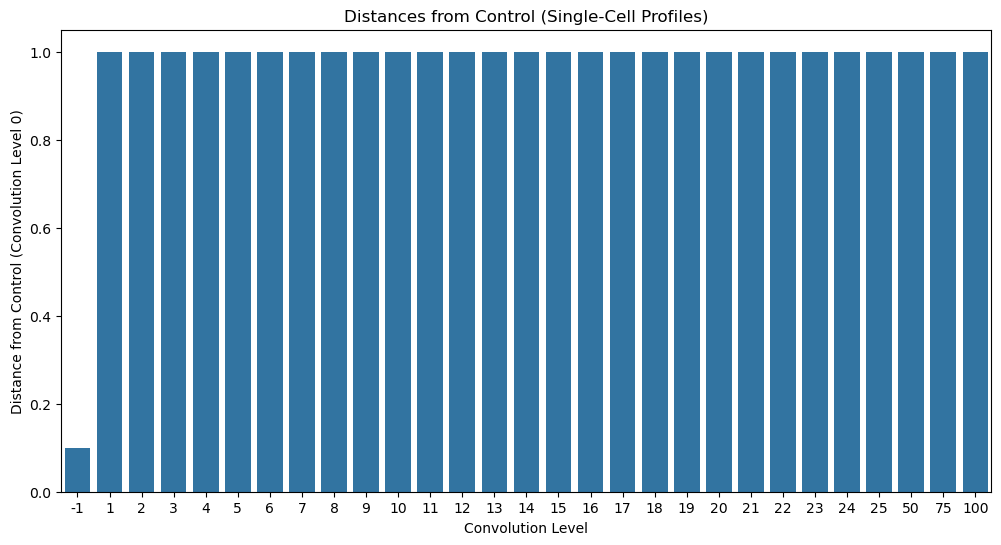

In [8]:
# plot feature correlations
plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_corr_df,
    x="Metadata_convolution",
    y="distance",
    order=sorted(feature_corr_df["Metadata_convolution"].unique(), key=int),
)
plt.title("Distances from Control (Single-Cell Profiles)")
plt.xlabel("Convolution Level")
plt.ylabel("Distance from Control (Convolution Level 0)")
plt.savefig(figure_dir / "sc_convolution_distance.png", dpi=600, bbox_inches="tight")
plt.show()

In [9]:
# look at the correlation of individual features between convolution level 0 and -1
control_profiles = sc_df[sc_df["Metadata_convolution"] == "0"]
conv_minus1_profiles = sc_df[sc_df["Metadata_convolution"] == "-1"]
if len(control_profiles) != len(conv_minus1_profiles):
    # downsample to the smaller size by removing the object ids not in both
    common_object_ids = set(control_profiles["Metadata_object_id"]).intersection(
        set(conv_minus1_profiles["Metadata_object_id"])
    )
    control_profiles = control_profiles[
        control_profiles["Metadata_object_id"].isin(common_object_ids)
    ]
    conv_minus1_profiles = conv_minus1_profiles[
        conv_minus1_profiles["Metadata_object_id"].isin(common_object_ids)
    ]
feature_correlations = {}
for feature in control_profiles.filter(regex="^(?!Metadata)").columns:
    if control_profiles[feature].shape != conv_minus1_profiles[feature].shape:
        [print(control_profiles[feature].shape, conv_minus1_profiles[feature].shape)]
    corr = np.corrcoef(control_profiles[feature], conv_minus1_profiles[feature])[0, 1]
    feature_correlations[feature] = corr
feature_corr_df = pd.DataFrame.from_dict(
    feature_correlations, orient="index", columns=["correlation"]
)
feature_corr_df = feature_corr_df.reset_index().rename(columns={"index": "feature"})
feature_corr_df.head()

,feature,correlation
0,Area.Size.Shape_Cell_CENTER.X,1.0
1,Area.Size.Shape_Cell_CENTER.Y,1.0
2,Area.Size.Shape_Cell_CENTER.Z,1.0
3,Area.Size.Shape_Nuclei_CENTER.X,1.0
4,Area.Size.Shape_Nuclei_CENTER.Y,1.0


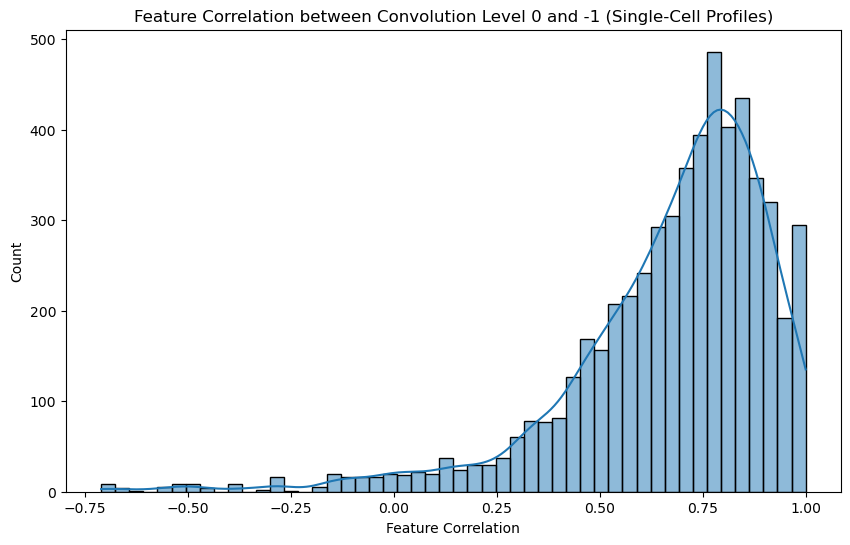

In [10]:
# print a per feature correlation histogram
plt.figure(figsize=(10, 6))
sns.histplot(feature_corr_df["correlation"], bins=50, kde=True)
plt.title(
    "Feature Correlation between Convolution Level 0 and -1 (Single-Cell Profiles)"
)
plt.xlabel("Feature Correlation")
plt.ylabel("Count")
plt.savefig(
    figure_dir / "sc_feature_correlation_histogram.png", dpi=600, bbox_inches="tight"
)
plt.show()

In [11]:
# show by correlation value the feature type
feature_corr_df["feature_type"] = feature_corr_df["feature"].apply(
    lambda x: x.split("_")[0]
)
feature_corr_df["feature_type"] = feature_corr_df["feature_type"].apply(
    lambda x: x.split(".")[0] if "sam" in x.lower() else x
)
# sort by correlation
feature_corr_df = feature_corr_df.sort_values(by="correlation", ascending=False)

In [12]:
feature_corr_df["feature_type"].unique()

array(['Area.Size.Shape', 'Intensity', 'Neighbors', 'Texture', 'SAMMed3D',
       'Colocalization', 'Granularity'], dtype=object)

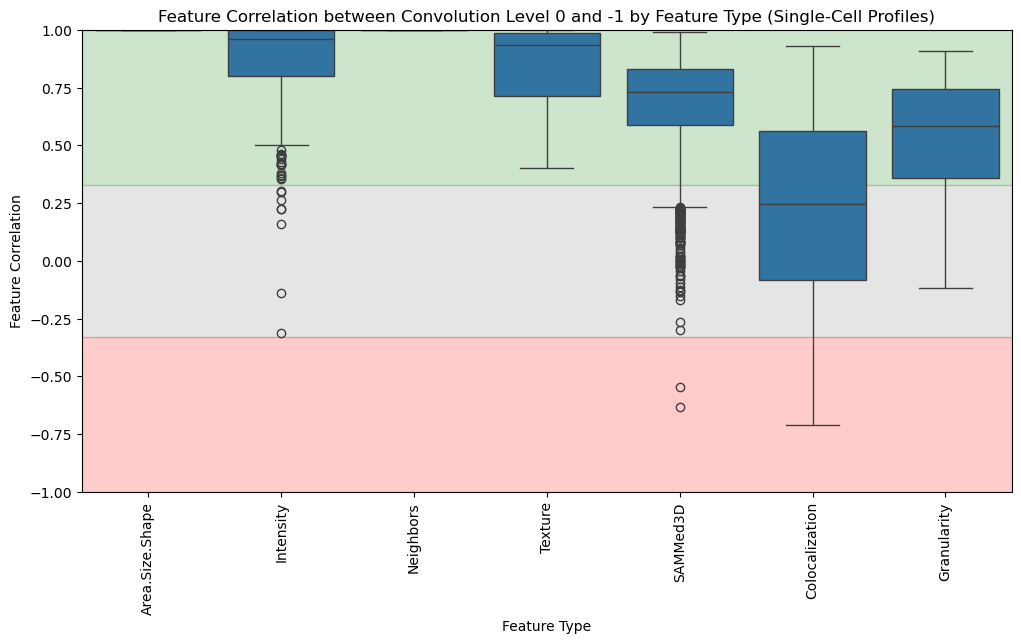

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=feature_corr_df,
    x="feature_type",
    y="correlation",
)
plt.title(
    "Feature Correlation between Convolution Level 0 and -1 by Feature Type (Single-Cell Profiles)"
)
plt.xlabel("Feature Type")
plt.ylabel("Feature Correlation")
plt.xticks(rotation=90)
plt.ylim(-1, 1)
# make the background from y 0.33 to 1 green
plt.axhspan(0.33, 1, color="green", alpha=0.2)
# make the background from y -0.33 to 0.33 gray
plt.axhspan(-0.33, 0.33, color="gray", alpha=0.2)
# make the background from y -1 to -0.33 red
plt.axhspan(-1, -0.33, color="red", alpha=0.2)
plt.savefig(
    figure_dir / "sc_feature_correlation_by_type.png", dpi=600, bbox_inches="tight"
)
plt.show()